<h1 align=center style="line-height:200%;color:#0099cc">
<font color="#0099cc">
China project
</font>
</h1>

<p style="text-align: justify;line-height:200%;font-size:medium">
<font size=3>
In this project, we are working with real data on houses in Beijing. We conduct comprehensive and useful analyses on this dataset and display the results through various charts, And with the help of machine learning, we try to predict house prices.

This project consists of five main parts:   
1_ In the first part, the data is read and unnecessary columns are removed. Missing values are also handled.   
2_ In the second part, columns are converted to the appropriate format, and outliers are removed.   
3_ In the third part, new features are created using the existing features.   
4_ In the fourth part, houses are plotted on a map using their geographical coordinates to get an overall view of the area.  
5_ In the final step, by training a machine learning model, we try to predict house prices.
</font>
</p>

<p>
First, we import the necessary libraries
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

<p>
take an overview of the dataset
</p>

In [2]:
housing = pd.read_csv('housing_data.csv', low_memory=False, encoding='gbk')
housing.head()

,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


<p>
Explanation of the dataset's features:
</p>

<center>
<table style=align: center>
<tr>
      <td><code>Unnamed: 0</code></td><td>The data index is unnecessary and should be removed</td>
</tr>

<tr>
      <td><code>url</code></td><td>Transaction link</td>
</tr>

<tr>
      <td><code>id</code></td><td>Transaction ID</td>
</tr>
 
<tr>
      <td><code>Lng</code></td><td>Longitude of the traded house</td>
</tr>
 
<tr>
      <td><code>Lat</code></td><td>Latitude of the traded house</td>
</tr>
  
<tr>
      <td><code>Cid</code></td><td>Buyer ID</td>
</tr>     
 
<tr>
      <td><code>tradeTime</code></td><td>Transaction time</td>
</tr>    

<tr>
      <td><code>DOM</code></td><td>The number of days since the house listing was posted</td>
</tr>    

<tr>
      <td><code>totalPrice</code></td><td>The price at which the house was sold</td>
</tr>    
  
<tr>
      <td><code>square</code></td><td>The area of the house</td>
</tr>       

<tr>
      <td><code>livingRoom</code></td><td>The number of living rooms</td>
</tr>       
  
<tr>
      <td><code>drawingRoom</code></td><td>The number of reception rooms</td>
</tr>       

<tr>
      <td><code>kitchen</code></td><td>The number of kitchens</td>
</tr>       
 
<tr>
      <td><code>bathRoom</code></td><td>The number of bathrooms</td>
</tr>       

<tr>
      <td><code>floor</code></td><td>The floor and height of the house</td>
</tr>       
    
<tr>
      <td><code>constructionTime</code></td><td>The year the house was built</td>
</tr>       
   
<tr>
      <td><code>renovationCondition</code></td><td>Renovation status of the house</td>
</tr>       
  
<tr>
      <td><code>buildingStructure</code></td><td>The structure of the house</td>
</tr>       
  
<tr>
      <td><code>ladderRatio</code></td><td>The floor and height of the house</td>
</tr>             
  
<tr>
      <td><code>elevator</code></td><td>Does the house have an elevator?</td>
</tr>       
  
<tr>
      <td><code>subway</code></td><td>Is the house accessible to the subway?</td>
</tr>    
    
<tr>
      <td><code>district</code></td><td>The neighborhood where the house is located</td>
</tr> 

</table>
</center>

<h2 style="line-height:200%;color:#0099cc">
Part One:
</h2>

<p>
Removing the columns <code>url</code>, <code>id</code>, <code>Cid</code>, <code>tradeTime</code> and the first column, which was the data index.
</p>

In [3]:
housing = housing.drop(["Cid", "id", "url", 'tradeTime', 'Unnamed: 0'], axis=1)

<p>
To remove missing values, we first need to take a look at the missing values in each column.
</p>

In [4]:
housing_null = pd.DataFrame(housing.isna().sum())
housing_null

,0
Lng,0
Lat,0
DOM,157977
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0
floor,0


<p>
The dom column has a lot of missing values but contains significant results

To choose a method for filling in the missing values, let's first look at the box plot for this column.
</p>

<Axes: >

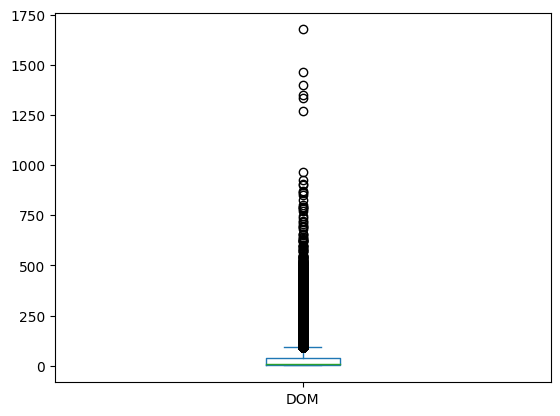

In [5]:
housing.DOM.plot(kind = 'box')

<p>
Since there are many outliers, we use the mode to fill in the missing values.
</p>

In [6]:
dom_mode = housing['DOM'].dropna().mode()[0]
housing['DOM'].fillna(float(dom_mode), inplace=True)

<p>
For the elevator and subway columns, since there are few missing values, we remove the missing values from the dataset.
</p>

In [7]:
housing.dropna(subset=['elevator', 'subway'], inplace=True)

<p>
As you can see, we've successfully gotten rid of all the missing values.
</p>

In [8]:
housing_null = pd.DataFrame(housing.isna().sum())
housing_null

,0
Lng,0
Lat,0
DOM,0
totalPrice,0
square,0
livingRoom,0
drawingRoom,0
kitchen,0
bathRoom,0
floor,0


<h2 style="line-height:200%;color:#0099cc">
Part Two:
</h2>

<p>
Columns that contain string values are of type Object. If you look more closely, you'll see that some numerical columns (such as the house construction year and house height) are also stored as objects. Next, we'll convert these columns to numerical values.
    
First, we use the unique method to see the unique values of these columns:
</p>

In [9]:
print('constructionTime : ',housing.constructionTime.unique())
print('floor : ',housing.floor.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']
floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低

<p>
The term "未知" means "unknown".                           
   
In this section, remove the houses with an unspecified construction year and then change the column type of constructionTime to int.
</p>

In [10]:
housing = housing[housing.constructionTime != '未知']
housing.constructionTime = housing.constructionTime.astype(int)

<p>
Now let's move on to the floor column, which is a bit different. In this column, each cell contains a Chinese word followed by a number. The number after the Chinese character indicates the height of the house. With the help of Google Translate, we discovered that these words mean "upper," "lower," and "middle." We could split this column into two separate columns, but here we'll discard the Chinese characters and keep only the numbers, then change the column type to int.
</p>

In [11]:
housing['floor'] = housing['floor'].str.split(" ", n = 1, expand = True)[1]
housing.floor = housing.floor.astype(int)

<p>
And then, we change the data type of some columns to make them understandable for the model. 
</p>

In [12]:
housing['livingRoom'] = housing['livingRoom'].astype(int)  
housing['drawingRoom'] = housing['drawingRoom'].astype(int)  
housing['bathRoom'] = housing['bathRoom'].astype(int)  

<p>
To remove outliers, we'll first plot a box plot of the price column.
</p>

<Axes: >

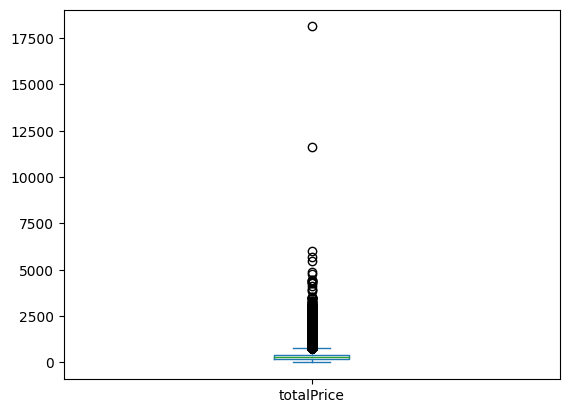

In [13]:
housing.totalPrice.plot(kind = 'box')

<p>
We'll remove houses whose total price doesn't fall within 1.5 times the interquartile range.
</p>

In [14]:
Q1 = housing.totalPrice.quantile(0.25)
Q3 = housing.totalPrice.quantile(0.75)
IQR = Q3 - Q1

housing = housing.drop(housing[(housing.totalPrice.values < Q1-1.5*IQR) | (housing.totalPrice.values > Q3+1.5*IQR)].index)

<p>
Now, we check the outliers for each column.
</p>

In [15]:
for i in housing.columns:
    c = 0
    Q1 = housing[i].quantile(0.25)
    Q3 = housing[i].quantile(0.75)
    IQR = Q3 - Q1
    c = housing[(housing[i].values < Q1-1.5*IQR) | (housing[i].values > Q3+1.5*IQR)].index
    c = list(c)
    if c != 0:
        print(f"{i} : {len(c)}")

Lng : 7491
Lat : 4618
DOM : 57536
totalPrice : 4402
square : 8387
livingRoom : 4914
drawingRoom : 76701
kitchen : 2915
bathRoom : 43435
floor : 11
constructionTime : 1876
renovationCondition : 0
buildingStructure : 0
ladderRatio : 4784
elevator : 0
subway : 0
district : 52532


<p>
We remove the outlier values.
</p>

In [16]:
for i in housing.columns:
    Q1 = housing[i].quantile(0.25)
    Q3 = housing[i].quantile(0.75)
    IQR = Q3 - Q1
    housing = housing.drop(housing[(housing[i].values < Q1-1.5*IQR) | (housing[i].values > Q3+1.5*IQR)].index)

for i in housing.columns:
    c = 0
    Q1 = housing[i].quantile(0.25)
    Q3 = housing[i].quantile(0.75)
    IQR = Q3 - Q1
    c = housing[(housing[i].values < Q1-1.5*IQR) | (housing[i].values > Q3+1.5*IQR)].index
    c = list(c)
    if c != 0:
        print(f"{i} : {len(c)}")

Lng : 368
Lat : 5021
DOM : 9902
totalPrice : 2590
square : 1056
livingRoom : 0
drawingRoom : 0
kitchen : 0
bathRoom : 0
floor : 0
constructionTime : 0
renovationCondition : 0
buildingStructure : 0
ladderRatio : 0
elevator : 0
subway : 0
district : 27724


<h2 style="line-height:200%;color:#0099cc">
Part Three:
</h2>

<p>
Using the latitude and longitude of each house, we'll calculate its distance from the city center of Beijing and add this as a new feature to the DataFrame. The latitude and longitude of Beijing's city center are 116.4074 and 39.9042, respectively. We'll use the following formula for calculation:
</p>

$$ distance = acos(sinφ_1*sinφ_2 + cosφ_1*cosφ_2 * cos(λ_2-λ_1)) * 6371.0088 $$
$$ φ: \text{latitude} $$ 
$$ λ: \text{longitude} $$ 

In [17]:
from math import radians
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)

# Convert to radians
Lat = housing['Lat'].apply(lambda x: radians(x))
Lng = housing['Lng'].apply(lambda x: radians(x))

x = np.arccos(np.sin(Lat)*np.sin(capital_Lat) + np.cos(Lat)*np.cos(capital_Lat)*np.cos(capital_Lng-Lng))

housing['distanceToCapital'] = x*6371.0088

<p>
In this dataset, the transaction price and area of each house are specified, but the price per square meter is not. We will calculate and store the price per square meter of each house in the pricePerSquare column.
</p>

In [18]:
housing['pricePerSquare'] = (housing['totalPrice'] / housing['square']) * 1000

<p>
Now we want to use the new column we've created to see how the price per square meter of houses changes as we move away from the city center. For this, we can use Seaborn's regplot, which not only displays points but also shows the trend of data with regression.
</p>

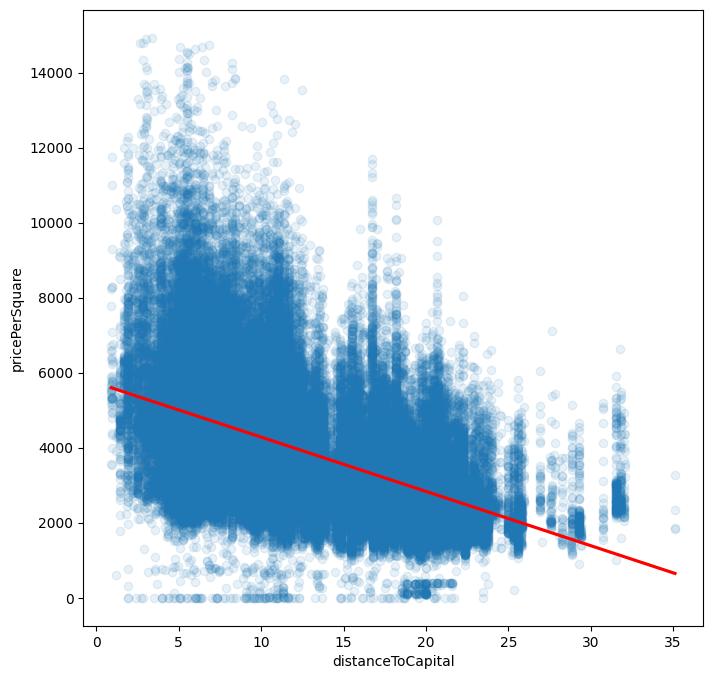

In [19]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing, x = 'distanceToCapital', y = 'pricePerSquare', line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

<h2 style="line-height:200%;color:#0099cc">
Part Four:
</h2>

<p>
In this dataset, the geographical coordinates of each house are specified. Using the scatter function from the Matplotlib library, you can plot houses on a map based on their locations and then analyze the map. Extremely useful information can be extracted from these maps. The density of different areas, features of houses in each area (having an elevator, area, price, etc.) are some of the information that can be obtained from this chart.
</p>

<p>
Due to the large volume of the dataset, we only use one percent of the rows to plot the charts.
</p>

In [20]:
housing_sample = housing.iloc[:-100:100]

<p>
Using the latitude and longitude of the houses, we plot them on a map and use the price per square meter to determine the color of the points.
</p>

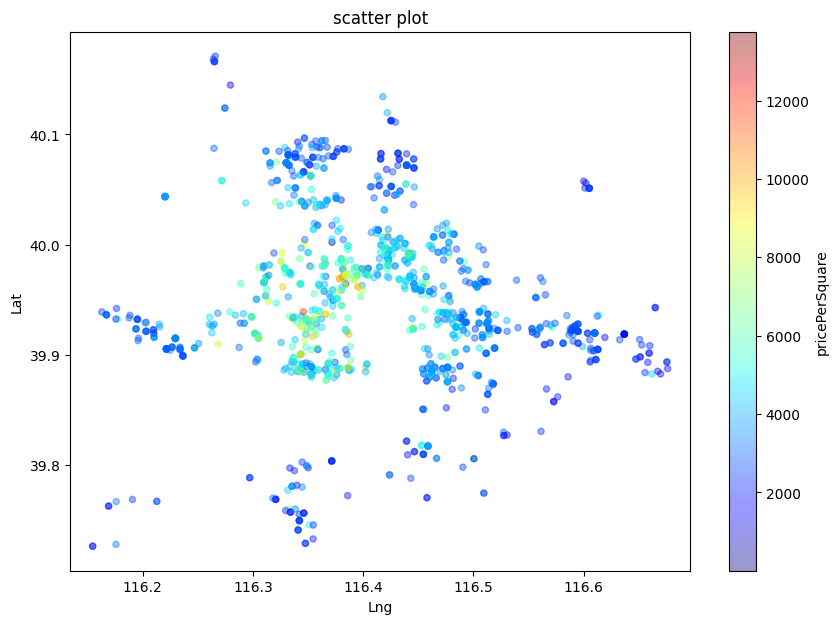

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

housing_sample.plot(x='Lng', y='Lat', ax=ax, kind='scatter', alpha=0.4, c='pricePerSquare', cmap=plt.get_cmap("jet"), colorbar=True)

ax.axis('equal')
ax.set_title('scatter plot');

<p>
The chart above shows that the most expensive houses (based on price per square meter) are located near the city center, and how prices decrease as you move away from the center.
    
So we can use the distance of each house from the city center as a criterion for the size of the points And we display the actual map behind it.
</p>

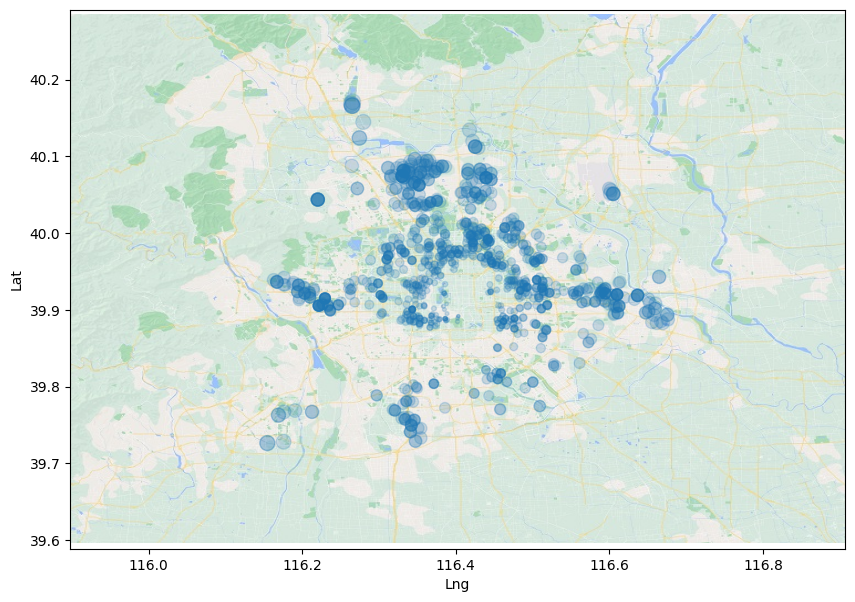

In [22]:
import matplotlib.image as mpimg
fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,7)
housing_sample.plot(x = 'Lng', y ='Lat', ax = ax1, kind = 'scatter', alpha = 0.2, s = housing_sample['distanceToCapital'] * 4)

beijing_img_1 = mpimg.imread('map1.jpg')
ax1.imshow(beijing_img_1, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
ax1.axis('equal');

<p>
This time, we'll take a different approach and use the district column to color the points. For determining the size of the points, we will use the square column.
</p>

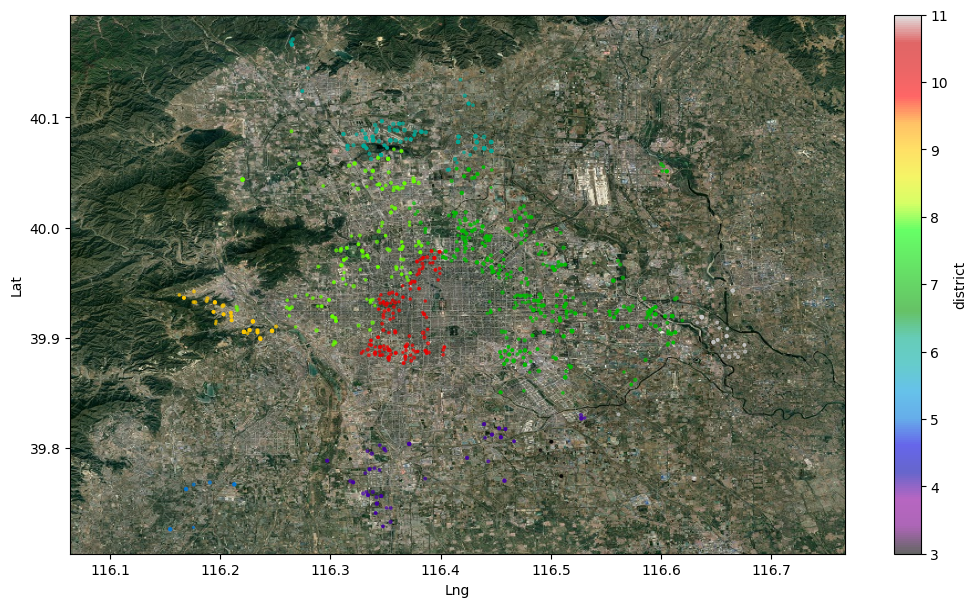

In [23]:
fig2, ax2 = plt.subplots(figsize = (12.5, 7))
ax2.axis("equal")

housing_sample.plot(x = "Lng", y = "Lat", c = "district", kind = "scatter", s = (housing_sample["square"] / 20) , cmap = plt.get_cmap('nipy_spectral'), ax = ax2, alpha = 0.6)

beijing_img_2 = mpimg.imread('map2.jpg')
ax2.imshow(beijing_img_2 , extent = [ax2.get_xlim()[0], ax2.get_xlim()[1], ax2.get_ylim()[0], ax2.get_ylim()[1]]);

<h2 style="line-height:200%;color:#0099cc">
Part Five:
</h2>

<p>
In the final stage of the project, we try to predict house prices using a machine learning model. 
</p>

<p>
Since our dependent variable, which is the price column, is a continuous variable, we need to use a regression model. And since the relationship between the independent variables and the dependent variable is not linear, we will use polynomial regression instead of linear regression. 
</p>

<p>
First, we delete the price per square meter column to prevent data leakage.
</p>

In [24]:
housing = housing.drop(["pricePerSquare"], axis=1)

<p>
We separate the independent variables from the dependent variable.
</p>

In [25]:
x = housing.drop(columns=['totalPrice'])
y = housing['totalPrice']

<p>
We divide the data into two parts: training and testing.
</p>

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<p>
We convert the inputs into polynomial expressions. 
</p>

In [27]:
from sklearn.preprocessing import PolynomialFeatures
Poly_transformer = PolynomialFeatures(degree=3, include_bias=True)

x_train_p = Poly_transformer.fit_transform(x_train)
x_test_p = Poly_transformer.fit_transform(x_test)

<p>
We build the model and train it on the data. 
</p>

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

model.fit(x_train_p, y_train.to_numpy()) 

LinearRegression(n_jobs=-1)

<p>
We evaluate the model using the R Squared method. 
</p>

In [29]:
from sklearn.metrics import r2_score

y_prediction = model.predict(x_test_p)
r2_score(y_test, y_prediction)

0.7111942586781863